# DATA ANALYSES

In this notebook, a quick analyse of the data is done.

## Importation

In [40]:
# Package importation.
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from seaborn import heatmap
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
# Data importation.
data_test = np.load("../data/test.npy", allow_pickle=True)
data_train = np.load("../data/training.npy", allow_pickle=True)

In [39]:
print("Data test's tail:", data_test[-1:,])

Data test's tail: [['id_ffda94f24'
  'GGAAAAACCAAUUGCUAUUAAAGGUUCCUUUGUUCGCUAAGUCCAACUACUAAACUGGGCGAGAUUAUGAAGGGCCUUGAGCAUCUGGAUACAGAGUGUUCGCACUCUGAAAAGAAACAACAACAACAAC'
  '.......(((..((((....(((((.(((((((...((..(((((..........))))).))...)))))))))))).))))..)))...(((((((....))))))).....................'
  'EEEEEEESSSIISSSSIIIISSSSSBSSSSSSSIIISSIISSSSSHHHHHHHHHHSSSSSISSIIISSSSSSSSSSSSISSSSIISSSXXXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE'
  91.0]]


In [4]:
print("Data train's tail:", data_train[-1:,])

Data train's tail: [['id_fff546103'
  'GGAAAGCUAGGACGUGGGAGCGUAGCUCUCCACACGGGUACGCCAAAGGUGUACACCGGGUCACUAGCGCCAUGCUUCGGCAUGGCAAAAGAAACAACAACAACAAC'
  '.....((((((((((((((((...)))).)))).((((((((((...))))))).))).))).)))))(((((((....))))))).....................'
  'EEEEESSSSSSSSSSSSSSSSHHHSSSSBSSSSMSSSSSSSSSSHHHSSSSSSSBSSSMSSSBSSSSSSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE'
  6.545 1.0 68
  array([ 1.0102,  1.7928,  1.9228,  0.9649,  0.5666,  0.2154,  0.0455,
          0.0127,  0.02  ,  0.0254,  0.2769,  0.2242,  1.0684,  0.4977,
          0.2255,  0.0621,  0.0507,  0.095 ,  0.056 ,  0.0444,  0.1978,
          2.0917,  1.2969,  0.553 ,  0.1053,  0.1784,  0.0441,  0.4684,
          1.4506,  0.2059,  0.1908,  0.4826,  0.1558,  0.4904,  0.0243,
          0.0074,  0.    ,  0.0231,  0.0242,  0.    , -0.0105,  0.0177,
          0.0877,  0.2689,  1.4352,  1.9672,  0.2942,  0.1248,  0.0779,
          0.0294,  0.0248,  0.0429,  0.0357,  0.192 ,  1.1468,  0.0057,
          0.022 ,  0.0652,  0.4332,  

## Description of the dataset

There's is do dataset: one for train a neural network and one for test it. Originally, data wasn't in a format proper for a easy manipulation. So they had written in an `.npy` format (*compile numpy array*). So here is given all information about the data.

> **NOTE :** All given descriptors are in the order. In other word, accessing to the column "0" correspond to the first line in given table...

### TEST SET

| **Descriptor** | **Signification**                                           |
| :------------: | :---------------------------------------------------------- |
|   `Sequence`   | The mRNA sequence.                                          |
|  `Structure`   | The mRNA structure. Which base are implied in a loop.       |
|  `Loop type`   | What is the type of loop.                                   |
|    `Score`     | Number of positions used for scoring with predicted values. |

### TRAIN SET

|        **Descriptor**        | **Signification**                                            |
| :--------------------------: | :----------------------------------------------------------- |
|          `Sequence`          | The mRNA sequence.                                           |
|         `Structure`          | The mRNA structure. Which base are implied in a loop.        |
|         `Loop type`          | What is the type of loop.                                    |
|           `Noise`            | Statistic error, on 68 nucleotide, of all tested conditions. |
|         `Filter SN`          | Indicates if the sample passed filters.                      |
|           `Score`            | Number of positions used for scoring with predicted values.  |
|         `Reactivity`         | Secondary structure probability for a given base.            |
| `Error link to "reactivity"` | Error [+/-].                                                 |
|         `Mg + pH 10`         | Probability of degradation for a given base.                 |
| `Error link to "Mg + pH 10"` | Error [+/-].                                                 |
|           `pH 10`            | Probability of degradation for a given base.                 |
|   `Error link to "pH 10"`    | Error [+/-].                                                 |
|         `Mg + 50°C`          | Probability of degradation for a given base.                 |
| `Error link to "Mg + 50°C"`  | Error [+/-].                                                 |
|            `50°C`            | Probability of degradation for a given base.                 |
|    `Error link to "50°C"`    | Error [+/-].                                                |

### Other data not input

There's data that has not been input into any dataset. For instance, the `Sequence length` is not given here, as far as a simple:

```python
len(data_test[1,1])
```

Give the good output, without flooding the dataset. `Index` is also not given here, because:

```python
data_test[i,]
```

Line `i` give the index.

## Data analyses

### Creating and checking dataframe with `Pandas`

In [5]:
# Dataframing the train dataset.
col = [
    "seq_id",
    "sequence",
    "structure",
    "loop_type",
    "noise",
    "sn_filter",
    "score",
    "reactivity",
    "E_reactivity",
    "mg_ph10",
    "E_mg_ph10",
    "ph10",
    "E_ph10",
    "mg_c50",
    "E_mg_c50",
    "c50",
    "E_c50",
]

train_set = pd.DataFrame(data_train, columns=col)

# Dataframing the train dataset.
col = [
    "seq_id",
    "sequence",
    "structure",
    "loop_type",
    "score"
]

test_set = pd.DataFrame(data_test, columns=col)

In [6]:
print("Train dataset header:")
train_set.head(1)

Train dataset header:


,seq_id,sequence,structure,loop_type,noise,sn_filter,score,reactivity,E_reactivity,mg_ph10,E_mg_ph10,ph10,E_ph10,mg_c50,E_mg_c50,c50,E_c50
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1.0,68,"[0.3297, 1.5693, 1.1227, 0.8686, 0.7217, 0.438...","[0.1359, 0.207, 0.1633, 0.1452, 0.1314, 0.105,...","[0.7556, 2.983, 0.2526, 1.3789, 0.6376, 0.3313...","[0.2613, 0.3842, 0.1372, 0.2531, 0.1798, 0.137...","[2.3375, 3.506, 0.3008, 1.0108, 0.2635, 0.3403...","[0.2631, 0.286, 0.0964, 0.1574, 0.1, 0.1019, 0...","[0.3581, 2.9683, 0.2589, 1.4552, 0.7244, 0.497...","[0.1501, 0.275, 0.0947, 0.1866, 0.1369, 0.1148...","[0.6382, 3.4773, 0.9988, 1.3228, 0.7877, 0.589...","[0.2167, 0.3475, 0.188, 0.2124, 0.1703, 0.1481..."


In [7]:
print("Test dataset header:")
test_set.head(1)

Test dataset header:


,seq_id,sequence,structure,loop_type,score
0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,68.0


In [8]:
# Getting data size.
print(f"Shape of train dataset:{train_set.shape}")
print(f"Shape of test dataset:{test_set.shape}")

Shape of train dataset:(2400, 17)
Shape of test dataset:(3634, 5)


In [9]:
print("Test dataset summary:")
test_set.describe()

Test dataset summary:


,seq_id,sequence,structure,loop_type,score
count,3634,3634,3634,3634,3634.0
unique,3634,3634,2381,2415,2.0
top,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,.....((((((((((.....))))))))))....((((((((((.....,EEEEESSSSSSSSSSHHHHHSSSSSSSSSSXXXXSSSSSSSSSSHH...,91.0
freq,1,1,175,118,3005.0


Here, **for the test dataset**, the only things important to underline is that there is only 2 different `score` values.

In [10]:
print("Train dataset summary:")
train_set.describe()

Train dataset summary:


,seq_id,sequence,structure,loop_type,noise,sn_filter,score,reactivity,E_reactivity,mg_ph10,E_mg_ph10,ph10,E_ph10,mg_c50,E_mg_c50,c50,E_c50
count,2400,2400,2400,2400,2400.0,2400.0,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400
unique,2400,2400,1507,1530,2037.0,2.0,1,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400
top,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.................................................,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,0.0,1.0,68,"[0.3297, 1.5693, 1.1227, 0.8686, 0.7217, 0.438...","[0.1359, 0.207, 0.1633, 0.1452, 0.1314, 0.105,...","[0.7556, 2.983, 0.2526, 1.3789, 0.6376, 0.3313...","[0.2613, 0.3842, 0.1372, 0.2531, 0.1798, 0.137...","[2.3375, 3.506, 0.3008, 1.0108, 0.2635, 0.3403...","[0.2631, 0.286, 0.0964, 0.1574, 0.1, 0.1019, 0...","[0.3581, 2.9683, 0.2589, 1.4552, 0.7244, 0.497...","[0.1501, 0.275, 0.0947, 0.1866, 0.1369, 0.1148...","[0.6382, 3.4773, 0.9988, 1.3228, 0.7877, 0.589...","[0.2167, 0.3475, 0.188, 0.2124, 0.1703, 0.1481..."
freq,1,1,278,278,95.0,1589.0,2400,1,1,1,1,1,1,1,1,1,1


Here, **for the test dataset**, the only things important to underline is that there is only 1 different `score` value, 2 different `sn_filter` values and `reactivity` values with `tests conditions` are all unique (as far as there are all `numpy array`).

In [11]:
print("Is there NAN in test dataset:", test_set.isnull().values.any())
print("Is there NAN in train dataset:", train_set.isnull().values.any())

Is there NAN in test dataset: False
Is there NAN in train dataset: False


Here, no `NAN` values have been found, so no data lines/columns have to be removed.

### Checking correlation

In [12]:
def mean_vector(label) -> np.array:
    mean_vector = []
    
    for vector in train_set.loc[:, label]:
        mean_vector += [np.mean(vector)]
    
    return np.array(mean_vector)

                 mean_reactivity  mean_mg_ph10  mean_ph10  mean_mg_c50  \
mean_reactivity            1.000         0.625      0.574        0.644   
mean_mg_ph10               0.625         1.000      0.587        0.723   
mean_ph10                  0.574         0.587      1.000        0.647   
mean_mg_c50                0.644         0.723      0.647        1.000   
mean_c50                   0.586         0.576      0.664        0.722   
sn_filter                  0.048         0.166      0.005        0.053   
score                        NaN           NaN        NaN          NaN   
noise                      0.190         0.275      0.045        0.105   

                 mean_c50  sn_filter  score  noise  
mean_reactivity     0.586      0.048    NaN  0.190  
mean_mg_ph10        0.576      0.166    NaN  0.275  
mean_ph10           0.664      0.005    NaN  0.045  
mean_mg_c50         0.722      0.053    NaN  0.105  
mean_c50            1.000      0.004    NaN  0.058  
sn_filter      

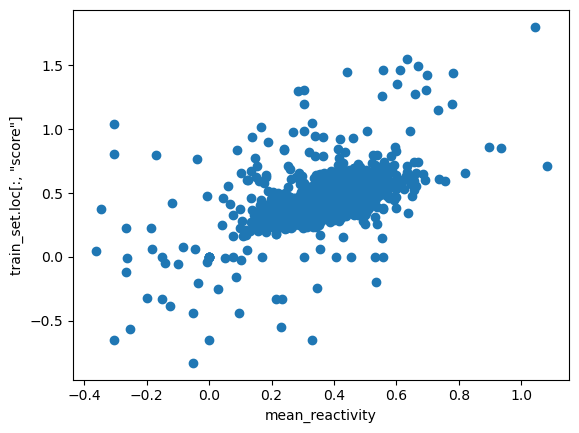

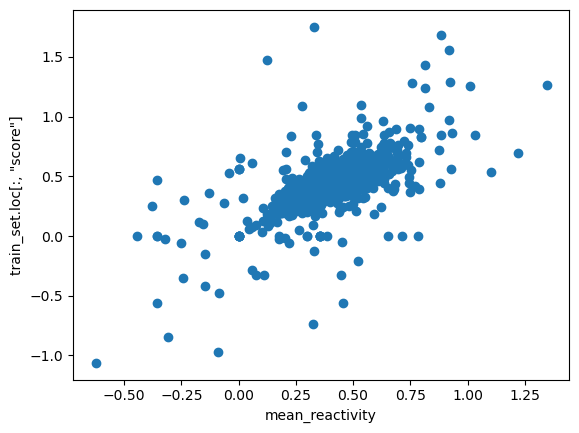

In [19]:
%matplotlib inline

# Mean vector.
mean_reactivity = mean_vector("reactivity")
mean_mg_ph10 = mean_vector("mg_ph10")
mean_ph10 = mean_vector("ph10")
mean_mg_c50 = mean_vector("mg_c50")
mean_c50 = mean_vector("c50")
# Extract simple data.
sn_filter = train_set.loc[:, "sn_filter"].astype(float)
score = train_set.loc[:, "score"].astype(float)
noise = train_set.loc[:, "noise"].astype(float)

# Transforming data in dataframe.

# Dataframing the train dataset.
col = [
    "mean_reactivity",
    "mean_mg_ph10",
    "mean_ph10",
    "mean_mg_c50",
    "mean_c50",
    "sn_filter",
    "score",
    "noise"
]

matrix = np.array([mean_reactivity, mean_mg_ph10, mean_ph10, mean_mg_c50,
                   mean_c50, sn_filter, score, noise]).transpose()

dataframe = pd.DataFrame(matrix, columns=col)

# Calculating correlation.
correlation = dataframe.corr()

print(np.round(correlation, 3))

# Plotting one example.
plot.scatter(mean_reactivity, mean_ph10)
plot.xlabel("mean_reactivity")
plot.ylabel("train_set.loc[:, \"score\"]")
plot.show()

# Plotting one example.
plot.scatter(mean_mg_c50, mean_c50)
plot.xlabel("mean_reactivity")
plot.ylabel("train_set.loc[:, \"score\"]")
plot.show()

Here, we found that some correlation between Y values/values to predict. But it's look like it's manly due to the fact that, when data are plot, there are concentrated in "one zone". For instance, for the plot up there, we see that data are gather between `X = [0, 0.75]` and `Y = [0, 1]`.

> **NOTE :** The score, when correlated, return `NAN` values. It's due to the fact that all score values are equal. So the covariance is `0`, so r is `NAN` (division by 0).

<AxesSubplot:>

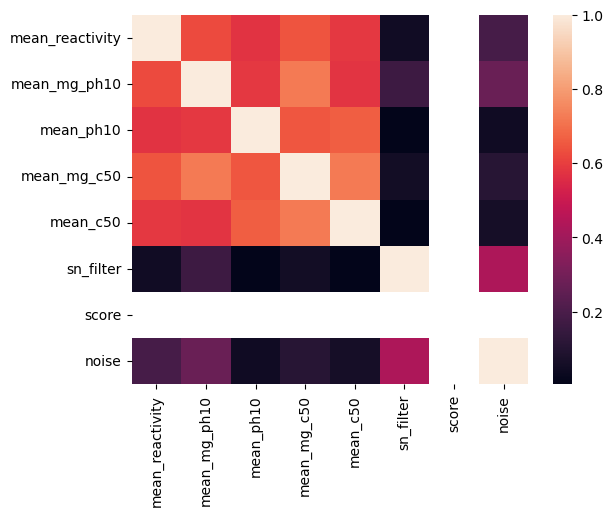

In [41]:
%matplotlib inline
# Correlation plot between Y values.
heatmap(correlation)

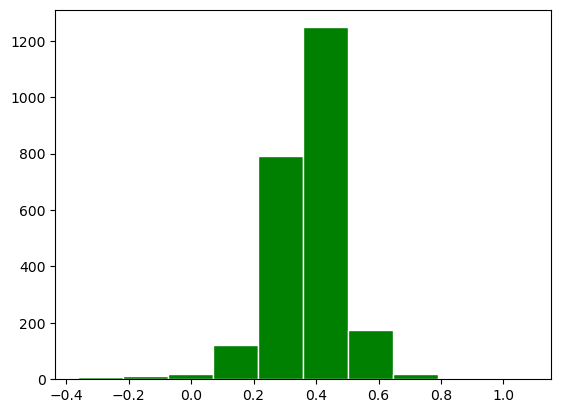

In [54]:
%matplotlib inline

hist = plot.hist(mean_reactivity, color="green", edgecolor="white")
plot.show()

# Loi uniforme pour répartir les points pour les shifts de l'axe X: en gros -> 
# on décale l'alignement sur 1 pour faire entre 1 +- U[0, 1].

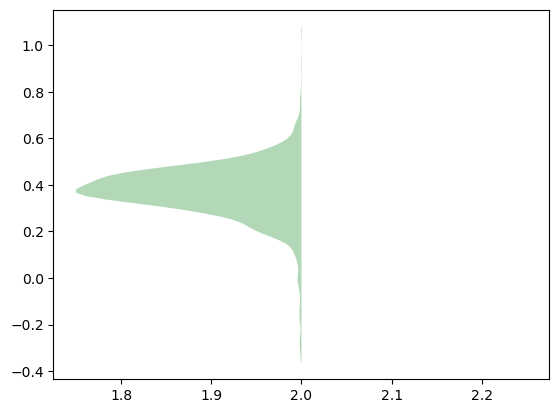

In [88]:
%matplotlib inline

violin = plot.violinplot(mean_reactivity, [2], showmeans=False, showmedians=False,
                         showextrema=False, points=100)

for part in violin["bodies"]:
    part.set_facecolor("#007F14")
    # get the center
    m = np.mean(part.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further left than the center
    part.get_paths()[0].vertices[:, 0] = np.clip(
        part.get_paths()[0].vertices[:, 0], -np.inf, m)

plot.show()


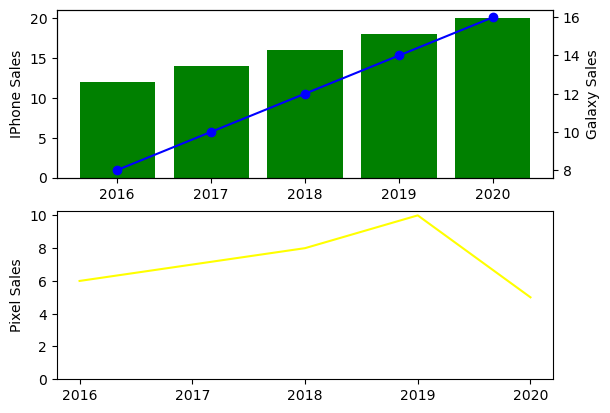

In [86]:
import matplotlib.pyplot as plt

# data prep (I made up data no accuracy in these stats)
mobile = ['Iphone','Galaxy','Pixel']

# Data for the mobile units sold for 4 Quaters in Million
units_sold = (('2016',12,8,6),
('2017',14,10,7),
('2018',16,12,8),
('2019',18,14,10),
('2020',20,16,5),)
# data prep - splitting the data
Years, IPhone_Sales, Galaxy_Sales, Pixel_Sales = zip(*units_sold)

# set the position
Position = list(range(len(units_sold)))

# set the width
Width = 0.2

plt.subplot(2, 1, 1)
Iphone = plt.bar(Position, IPhone_Sales,color='green')
plt.ylabel('IPhone Sales')
plt.xticks(Position, Years)

plt.twinx()
Galaxy = plt.plot(Position, Galaxy_Sales, 'o-', color='blue')
plt.ylabel('Galaxy Sales')
plt.xticks(Position, Years)

plt.subplot(2, 1, 2)
plt.plot(Position, Pixel_Sales, color='yellow')
plt.ylabel('Pixel Sales')
plt.gca().set_ylim(ymin=0)
plt.xticks(Position, Years)

plt.show()

## Conclusions

It's look like there's correlation between the different degradation probabilities conditions. Thus, it's not looking abnormal due to the fact that conditions are very similar (and adding conditions increases the probability, so there's still a link). However, those correlations are on \[Y\] data/the one that have to be predicted.

Else, nothing wrong have been underlined by those quick analyses.